<a href="https://colab.research.google.com/github/rohitghsh/InsuranceFraudDetection/blob/main/Insurance_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Insurance Fraud Detection (DS)
---------------------------------------------

In [ ]:
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 166MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('train_2023.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


In [ ]:
# hint: do you have imbalanced data?
df['fraud'].value_counts() # yes you do!

0    16062
1     2938
Name: fraud, dtype: int64

In [ ]:
# split the data (don't change this!)

X = df.drop(['claim_number', 'fraud'],axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 25)
(15200, 23) (15200,)
(3800, 23) (3800,)


Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!

# Exploratory Data Analysis

## Plots

<Axes: xlabel='age_of_driver', ylabel='safty_rating'>

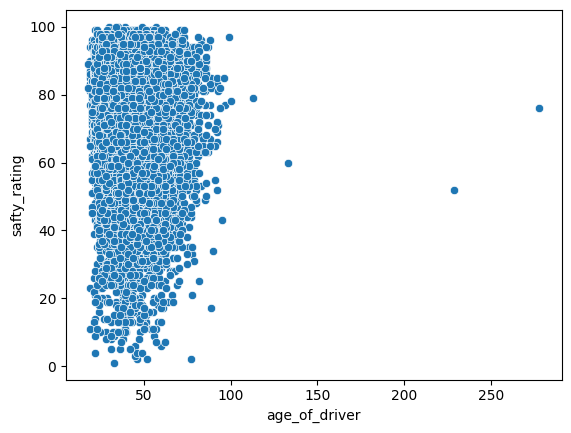

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = df, x = 'age_of_driver', y = 'safty_rating' )



*  From above we can see that there is a decently positive relationship between age_of_driver and safty_rating which could be attributed to experience




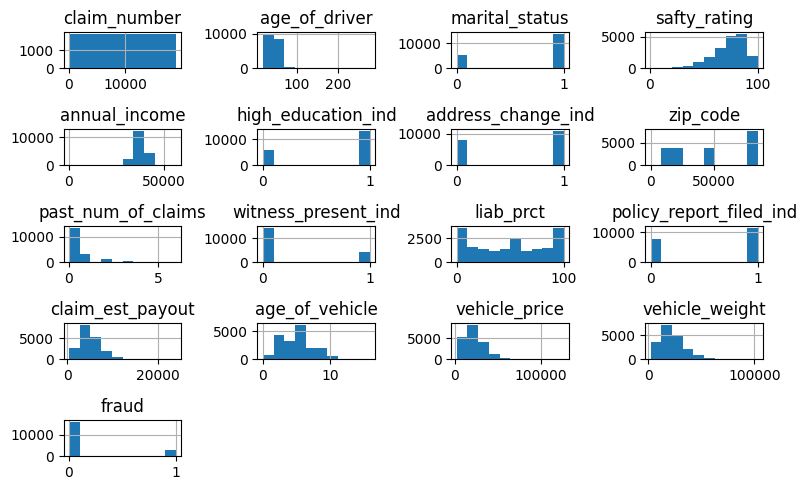

In [ ]:
df.hist(figsize=(8, 5))

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

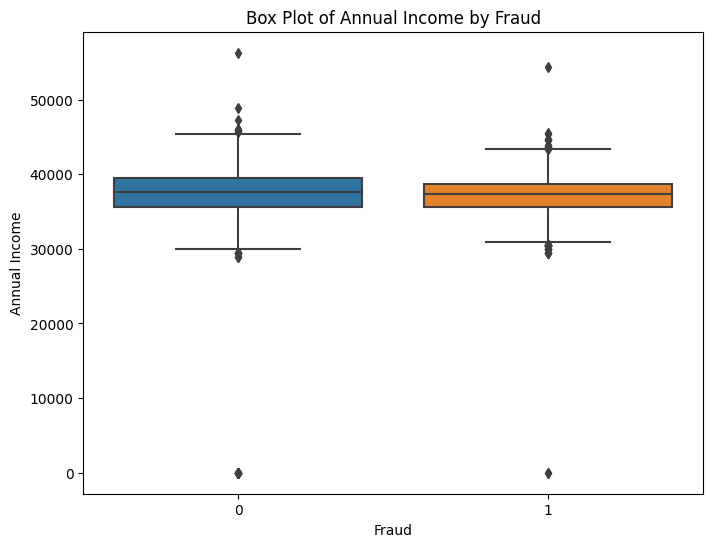

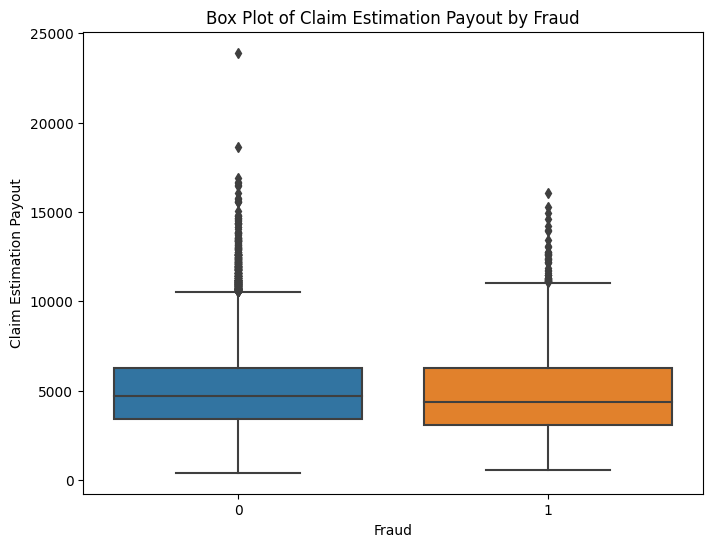

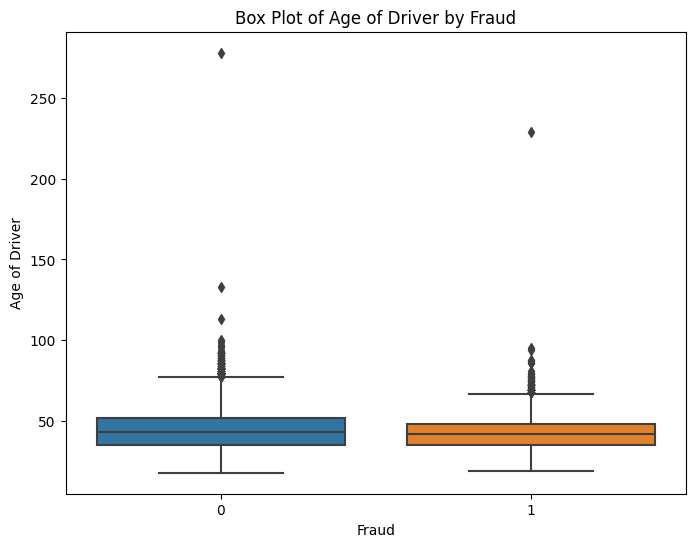

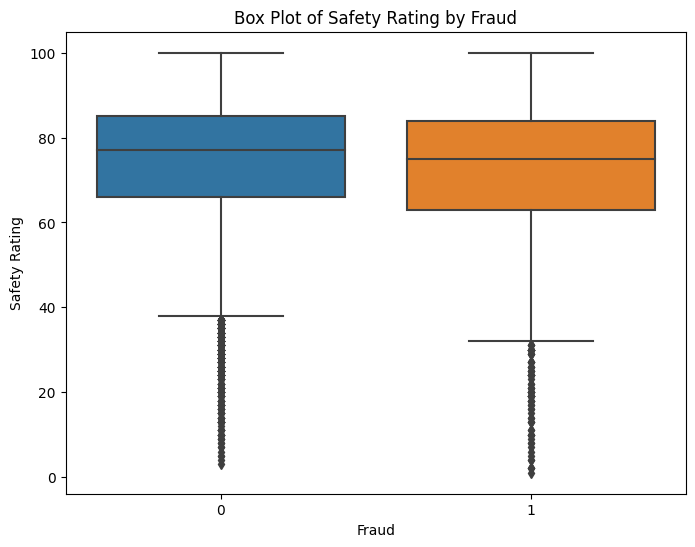

In [ ]:
# Box plot of Annual Income by Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='annual_income', data=df)
plt.xlabel('Fraud')
plt.ylabel('Annual Income')
plt.title('Box Plot of Annual Income by Fraud')
plt.show()

# Box plot of Claim Estimation Payout by Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='claim_est_payout', data=df)
plt.xlabel('Fraud')
plt.ylabel('Claim Estimation Payout')
plt.title('Box Plot of Claim Estimation Payout by Fraud')
plt.show()

# Box plot of Age of Driver by Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='age_of_driver', data=df)
plt.xlabel('Fraud')
plt.ylabel('Age of Driver')
plt.title('Box Plot of Age of Driver by Fraud')
plt.show()

# Box plot of Safety Rating by Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='safty_rating', data=df)
plt.xlabel('Fraud')
plt.ylabel('Safety Rating')
plt.title('Box Plot of Safety Rating by Fraud')
plt.show()

The above plot shows the difference in distributions of variables with Fraud and those without and pinpoints outliers in variables like age_of_driver where the age exceeds 100

<Axes: xlabel='age_of_vehicle', ylabel='claim_est_payout'>

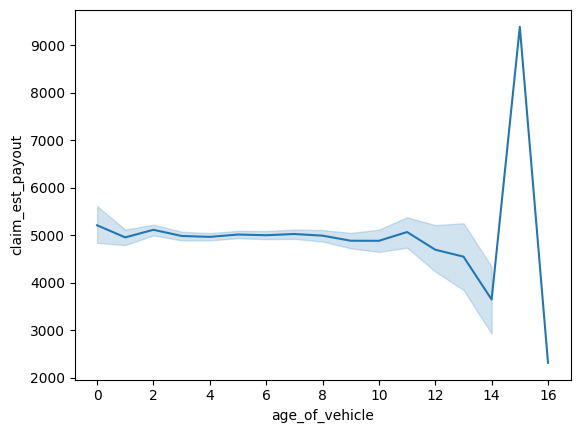

In [ ]:
sns.lineplot(data=df, x='age_of_vehicle', y='claim_est_payout')


From above we can see that the estimated payout somewhat decreeases as the age of the vehicle increases

<ipython-input-6-2d593c47609e>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = corr_data.corr()


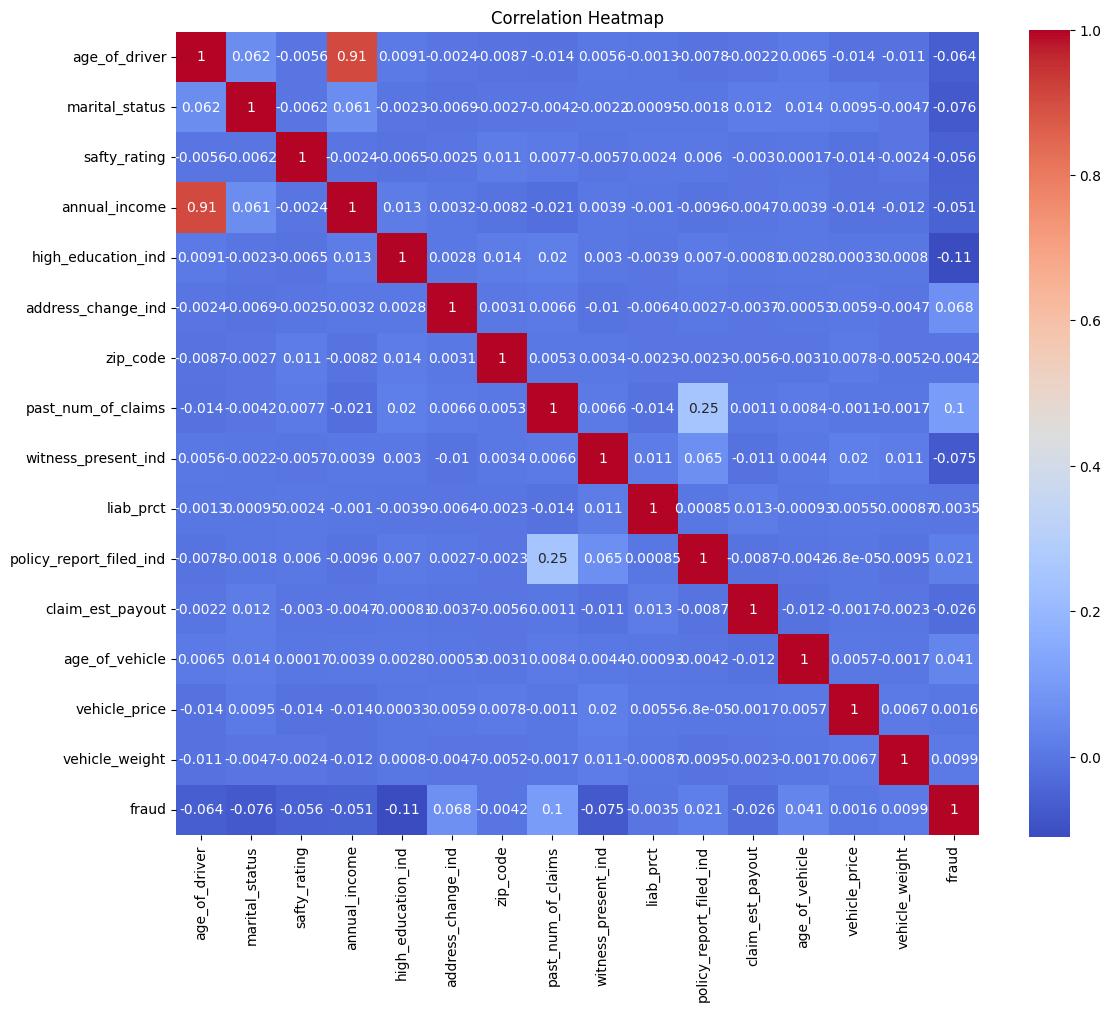

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables for correlation heatmap
variables = ['age_of_driver', 'gender', 'marital_status', 'safty_rating', 'annual_income',
             'high_education_ind', 'address_change_ind', 'living_status', 'zip_code',
             'claim_date', 'claim_day_of_week', 'accident_site', 'past_num_of_claims',
             'witness_present_ind', 'liab_prct', 'channel', 'policy_report_filed_ind',
             'claim_est_payout', 'age_of_vehicle', 'vehicle_category', 'vehicle_price',
             'vehicle_color', 'vehicle_weight', 'fraud']

# Create a DataFrame with the selected variables
corr_data = df[variables]

# Compute the correlations between variables
correlations = corr_data.corr()

# Create a heatmap of the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap='coolwarm', annot=True, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


Here we can see that the highest correlation is between  the age of the driver and their annual income

## Tables

In [ ]:


# create a new column to recode the target variable of median house value to a 0 or 1 based on the mean
df['FLAG_safty_rating'] = np.where(df['safty_rating'] <= np.mean(df['safty_rating']), 0, 1)

In [ ]:
df.groupby('fraud').min()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,FLAG_safty_rating
fraud,,,,,,,,,,,,,,,,,,,,,
0,0,18,F,0.0,3,-1,0,0,Own,0,...,0,Broker,0,417.826352,0.0,Compact,2261.507903,black,2429.429302,0
1,9,19,F,0.0,1,-1,0,0,Own,0,...,0,Broker,0,548.687856,0.0,Compact,3073.101759,black,2844.461418,0


In [ ]:
df.groupby('FLAG_safty_rating').max()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
FLAG_safty_rating,,,,,,,,,,,,,,,,,,,,,
0,18993,229,M,1.0,73,54333,1,1,Rent,85083,...,100,Phone,1,23903.36625,16.0,Medium,97621.7011,white,95464.35438,1
1,18999,278,M,1.0,100,56275,1,1,Rent,85083,...,100,Phone,1,18621.35367,15.0,Medium,127063.5060,white,103192.72370,1


In [ ]:
lowData= df[df['fraud']==0]
print(lowData.shape)
lowData.head()

(16062, 26)


,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,FLAG_safty_rating
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0,1
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0,1
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0,1


In [ ]:
tmp = df[(df['fraud']==0) | (df['age_of_vehicle']==1)]
print(tmp.shape)
tmp.head()

(16139, 26)


,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,FLAG_safty_rating
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0,1
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0,1
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0,1


In [ ]:
highData= df[df['fraud']==1]
print(highData.shape)
highData.head()

(2938, 26)


,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,FLAG_safty_rating
9,9,47,M,1.0,85,38505,0,1,Own,15057,...,Broker,0,3819.521132,4.0,Large,18286.27439,black,24021.61606,1,1
14,14,50,F,1.0,91,39127,0,1,Own,50051,...,Broker,0,2912.010859,7.0,Compact,21008.06659,silver,22378.53122,1,1
17,17,51,M,0.0,85,39315,0,1,Own,20128,...,Phone,1,3244.000621,5.0,Compact,30487.73911,blue,22430.12473,1,1
30,30,43,M,1.0,55,37606,1,1,Own,15010,...,Broker,1,3364.999889,7.0,Large,20290.52195,red,41748.55575,1,0
33,33,64,M,1.0,75,41581,0,1,Own,20109,...,Broker,0,2778.539378,7.0,Medium,18908.21677,other,36256.14560,1,1


In [ ]:
tmpRows = lowData.shape[0]+highData.shape[0]
tmpRows


19000

In [ ]:
tmpRows == df.shape[0]

True

In [ ]:
table = pd.pivot_table(df, values='witness_present_ind', index=['fraud'],
                    columns=['FLAG_safty_rating'], aggfunc=np.sum)
table

FLAG_safty_rating,0,1
fraud,,
0,1683.0,2310.0
1,205.0,269.0


In [ ]:
table = pd.pivot_table(df, values=['witness_present_ind', 'past_num_of_claims'], index=['fraud', 'FLAG_safty_rating'],
                       aggfunc={'witness_present_ind': np.mean,
                                'past_num_of_claims': [min, max, np.mean]})
table

past_num_of_claims               witness_present_ind
                                       max      mean min                mean
fraud FLAG_safty_rating                                                     
0     0                                  6  0.447424   0            0.256009
      1                                  6  0.464771   0            0.246795
1     0                                  5  0.731050   0            0.150073
      1                                  6  0.728608   0            0.172768

# Data Cleaning and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
print(X_train.describe())

       age_of_driver  marital_status  safty_rating  annual_income  \
count   15200.000000    15196.000000  15200.000000   15200.000000   
mean       43.577368        0.717491     73.470395   37331.196184   
std        12.115236        0.450234     15.472854    2996.757118   
min        18.000000        0.000000      1.000000      -1.000000   
25%        35.000000        0.000000     65.000000   35550.000000   
50%        43.000000        1.000000     76.000000   37607.000000   
75%        51.000000        1.000000     85.000000   39317.000000   
max       278.000000        1.000000    100.000000   56275.000000   

       high_education_ind  address_change_ind      zip_code  \
count        15200.000000        15200.000000  15200.000000   
mean             0.699211            0.571579  49927.536382   
std              0.458616            0.494866  29213.752490   
min              0.000000            0.000000      0.000000   
25%              0.000000            0.000000  20111.000000   


In [ ]:
print(X_train.isnull().sum())

age_of_driver                0
gender                       0
marital_status               4
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        113
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            18
age_of_vehicle               6
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
dtype: int64


## Handling missing values using cubic interpolation

Handling missing values using cubic interpolation in training set

In [ ]:


X_train = X_train.interpolate(method = 'cubic')

# Handling missing values in 'marital_status'
X_train['marital_status'].fillna(X_train['marital_status'].mode()[0], inplace=True)

# Handling missing values in 'witness_present_ind'
X_train['witness_present_ind'].fillna('0', inplace=True)

# Handling missing values in 'claim_est_payout'
X_train['claim_est_payout'].fillna(X_train['claim_est_payout'].mean(), inplace=True)

# Handling missing values in 'age_of_vehicle'
X_train['age_of_vehicle'].fillna(X_train['age_of_vehicle'].median(), inplace=True)





In [ ]:
print(X_train.isnull().sum())

age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
dtype: int64


In [ ]:
print(X_test.isnull().sum())

age_of_driver               0
gender                      0
marital_status              0
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
zip_code                    0
claim_date                  0
claim_day_of_week           0
accident_site               0
past_num_of_claims          0
witness_present_ind        30
liab_prct                   0
channel                     0
policy_report_filed_ind     0
claim_est_payout            5
age_of_vehicle              1
vehicle_category            0
vehicle_price               0
vehicle_color               0
vehicle_weight              0
dtype: int64


Handling missing values using cubic interpolation in test set

In [ ]:
#
X_test = X_test.interpolate(method = 'cubic')

# Handling missing values in 'witness_present_ind'
X_test['witness_present_ind'].fillna(0.0, inplace=True)

# Handling missing values in 'claim_est_payout'
X_test['claim_est_payout'].fillna(X_train['claim_est_payout'].mean(), inplace=True)

# Handling missing values in 'age_of_vehicle'
X_test['age_of_vehicle'].fillna(X_train['age_of_vehicle'].median(), inplace=True)


In [ ]:
print(X_test.isnull().sum())

age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
dtype: int64


In [ ]:
X_test.dtypes

age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
dtype: object

In [ ]:
X_train.dtypes


age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
dtype: object

replacing categorical values with numerical labels

In [ ]:

X_test['gender'].replace(['F', 'M'],
                        [0, 1], inplace=True)
X_train['gender'].replace(['F', 'M'],
                        [0, 1], inplace=True)
# replacing values
X_test['living_status'].replace(['Own', 'Rent'],
                        [0, 1], inplace=True)
X_train['living_status'].replace(['Own', 'Rent'],
                        [0, 1], inplace=True)

## Creating Dummy variables for variables with multiple categories

In [ ]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['channel'], prefix='channel')],axis=1)
X_train.head()
X_test = pd.concat([X_test, pd.get_dummies(X_test['channel'], prefix='channel')],axis=1)
X_test.head()
del X_train['channel']
del X_test['channel']







In [ ]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['claim_day_of_week'], prefix='claim_day_of_week')],axis=1)
X_train.head()
X_test = pd.concat([X_test, pd.get_dummies(X_test['claim_day_of_week'], prefix='claim_day_of_week')],axis=1)
X_test.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,...,channel_Broker,channel_Online,channel_Phone,claim_day_of_week_Friday,claim_day_of_week_Monday,claim_day_of_week_Saturday,claim_day_of_week_Sunday,claim_day_of_week_Thursday,claim_day_of_week_Tuesday,claim_day_of_week_Wednesday
7592,38,0,0.0,89,36375,1,0,0,50036,10/29/2015,...,0,0,1,0,0,0,0,1,0,0
12051,53,0,1.0,75,39694,1,0,0,85031,5/25/2016,...,0,0,1,0,0,0,0,0,0,1
17353,40,0,0.0,61,36881,0,1,0,20142,8/13/2016,...,0,0,1,0,0,1,0,0,0,0
17873,18,1,0.0,82,28910,1,1,0,15021,11/17/2015,...,1,0,0,0,0,0,0,0,1,0
18496,38,1,1.0,83,36370,1,0,0,15042,9/10/2015,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
del X_train['claim_day_of_week']
del X_test['claim_day_of_week']

In [ ]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['accident_site'], prefix='accident_site')],axis=1)
X_train.head()
X_test = pd.concat([X_test, pd.get_dummies(X_test['accident_site'], prefix='accident_site')],axis=1)
X_test.head()
del X_train['accident_site']
del X_test['accident_site']

In [ ]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['vehicle_category'], prefix='vehicle_category')],axis=1)
X_train.head()
X_test = pd.concat([X_test, pd.get_dummies(X_test['vehicle_category'], prefix='vehicle_category')],axis=1)
X_test.head()
del X_train['vehicle_category']
del X_test['vehicle_category']

In [ ]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['vehicle_color'], prefix='vehicle_color')],axis=1)
X_train.head()
X_test = pd.concat([X_test, pd.get_dummies(X_test['vehicle_color'], prefix='vehicle_color')],axis=1)
X_test.head()
del X_train['vehicle_color']
del X_test['vehicle_color']

## Seperating date variable into days months and years

In [ ]:
X_train['claim_date'] = pd.to_datetime(X_train['claim_date'])
X_test['claim_date'] = pd.to_datetime(X_test['claim_date'])
X_train['claim_day'] = X_train['claim_date'].dt.day
X_train['claim_month'] = X_train['claim_date'].dt.month
X_train['claim_year'] = X_train['claim_date'].dt.year

X_test['claim_day'] = X_test['claim_date'].dt.day
X_test['claim_month'] = X_test['claim_date'].dt.month
X_test['claim_year'] = X_test['claim_date'].dt.year

X_train.drop('claim_date', axis=1, inplace=True)
X_test.drop('claim_date', axis=1, inplace=True)






In [ ]:
print(X_train['witness_present_ind'].dtypes)


float64


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_of_driver                15200 non-null  int64  
 1   gender                       15200 non-null  int64  
 2   marital_status               15200 non-null  float64
 3   safty_rating                 15200 non-null  int64  
 4   annual_income                15200 non-null  int64  
 5   high_education_ind           15200 non-null  int64  
 6   address_change_ind           15200 non-null  int64  
 7   living_status                15200 non-null  int64  
 8   zip_code                     15200 non-null  int64  
 9   past_num_of_claims           15200 non-null  int64  
 10  witness_present_ind          15200 non-null  float64
 11  liab_prct                    15200 non-null  int64  
 12  policy_report_filed_ind      15200 non-null  int64  
 13  claim_est_pay

 ## Reducing outliers values

In [ ]:
X_train.loc[X_train['age_of_driver'] > 100, "age_of_driver"] = 100

X_test.loc[X_test['age_of_driver'] > 100, "age_of_driver"] = 100

## MinMax scaling the partitions

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Oversampling imbalanced training dataset using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

from collections import Counter

oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X_train_scaled, y_train)


# Fitting the model

## Fitting a Random Forest classifier to the processed training set

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000,
                            max_depth = 10)
RF.fit(X_res, y_res)
y_pred = RF.predict(X_test_scaled)

y_train_pred = RF.predict(X_res)



# Model Results

In [ ]:
from sklearn.metrics import confusion_matrix


print ('Training performance')
print(classification_report(y_res,y_train_pred))

print(confusion_matrix(y_res,y_train_pred))

print ('\nTest performance')

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

Training performance
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12853
           1       0.93      0.86      0.89     12853

    accuracy                           0.90     25706
   macro avg       0.90      0.90      0.90     25706
weighted avg       0.90      0.90      0.90     25706

[[12062   791]
 [ 1819 11034]]

Test performance
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3209
           1       0.36      0.25      0.30       591

    accuracy                           0.81      3800
   macro avg       0.62      0.58      0.59      3800
weighted avg       0.79      0.81      0.80      3800

[[2948  261]
 [ 443  148]]


# Model Interpretebility

## Permutation Importance Box plots

In [ ]:
# permutation importance is on X_test

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


# let's make this repeatable! all you need to do is assign
# a model object to clf!

clf = RF # just update the title!

result = permutation_importance(clf, X_test_scaled, y_test, n_repeats=15,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

In [ ]:
X_test.shape

(3800, 43)

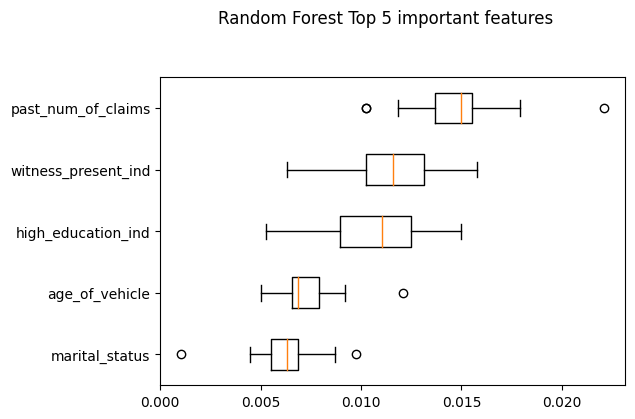

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx[-5:]].T, vert=False,
            labels=X_test.columns[perm_sorted_idx[-5:]])
fig.suptitle('Random Forest Top 5 important features', y=1.05)

plt.show()



## Partial Dependence

In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


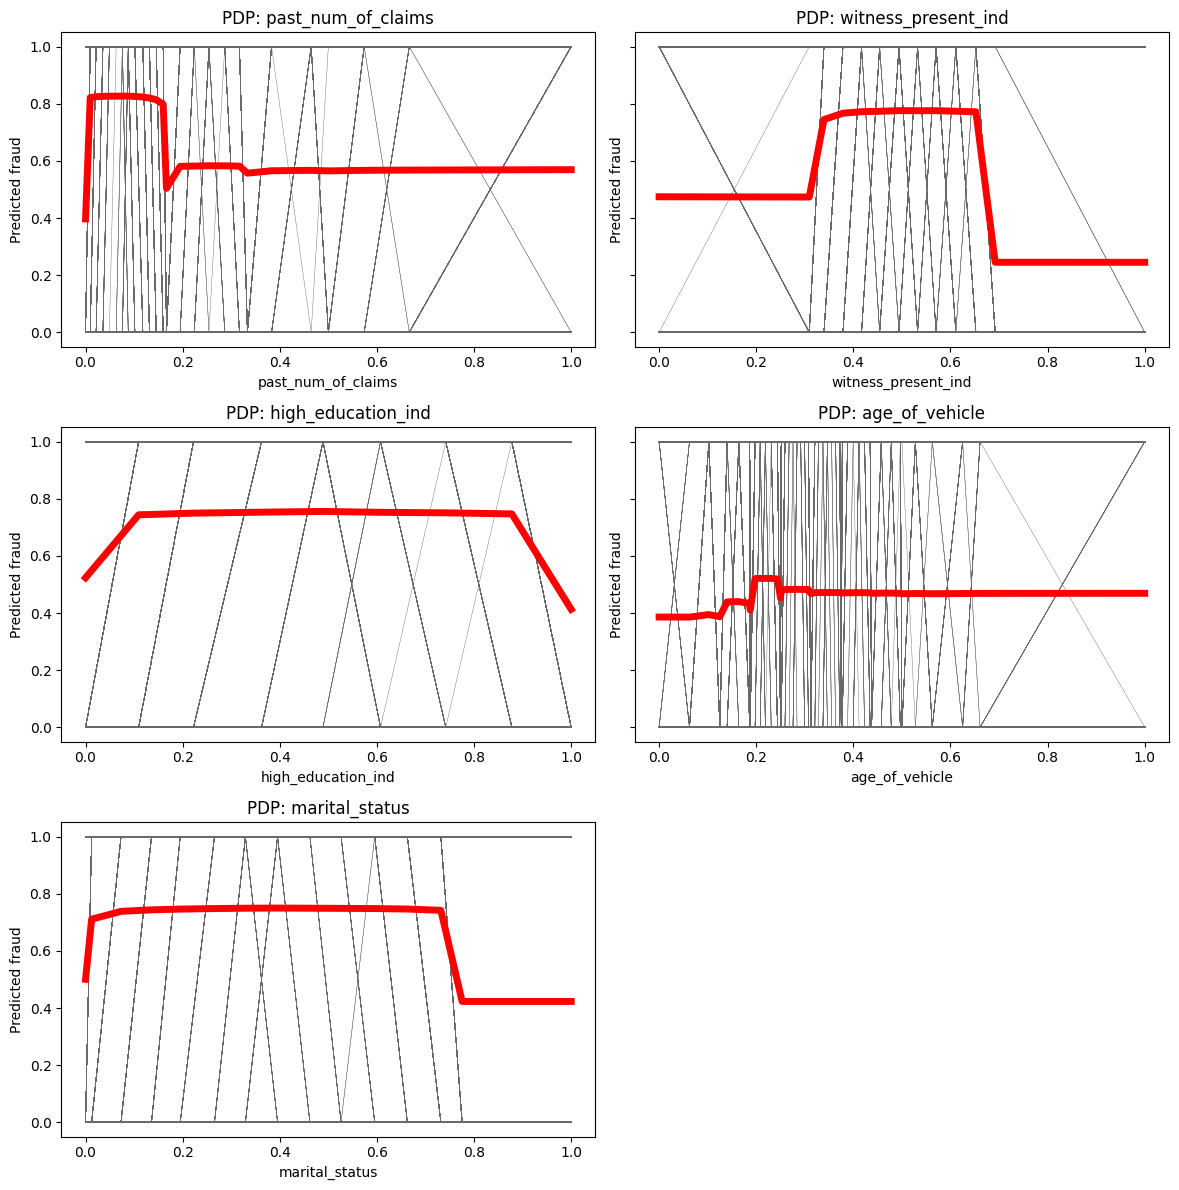

In [ ]:
# partial dependence is on X_train
features = X_train.columns[perm_sorted_idx[-1:-6:-1]]
fig, axes = plt.subplots(3,2, sharey = True,figsize=(12, 12))
for i in range(5):
  tmpdf = ice(data=pd.DataFrame(X_res, columns = X_train.columns), # ice needs a dataframe
            column=features[i], # the column name
                  predict=RF.predict, num_grid_points=100) # the predict statement from the
                                          # model
  ice_plot(tmpdf,ax = axes[i//2][i%2], c='dimgray', linewidth=0.3,
                  plot_pdp=True,
        pdp_kwargs={'linewidth': 5, 'color':'red'})
  axes[i//2][i%2].set_title("PDP: "+features[i])
  axes[i//2][i%2].set_ylabel('Predicted fraud')
  axes[i//2][i%2].set_xlabel(str(features[i]))

  plt.tight_layout()

axes[2][1].axis('off')
plt.show()


## Business Sugesstion

From the above we can see that Past_num_of_claims, Witness_present_ind, high_education_ind, age_of_vehicle and marital_status are the top 5 influential factors in detecting fraud.

With these in mind and using the PDP plots we recommend the following

* Since probability of fraud somewhat increases with Past number of claims, we investigate the claims of people with previous claims more rigorously

* Since probability of fraud somewhat decreases with witnesses present, insist on witnesses in otder to claim insurance

* Since probability of fraud somewhat decreases with higher education of driver, provide insurances more to drivers with higher education

* Since probability of fraud slightly increases with age of vehicle, ask for higher premiums for older vehicles

* Since probability of fraud somewhat decreases with marital status, provide insurances more to married drivers

# Conclusions


* Cleaning the data takes up most of the time in creating a model. It is a lengthy and meticulous task
* The choice of sampling (upsampling/downsampling) can affect the accuracy of the model. Upsampling can be more helpful when the size of the dataset is small
* TPOT and grid searches can be a useful tools in building a model, but they demand huge amount of time and resources to optimise
* High accuracy doesnt always mean the model is working well. Weighted F1 score is a more reliable metric for classification
* Vigilance against errors in coding is crucial. Any error in coding can cause the program to crash or provide wrong results

# Appendix

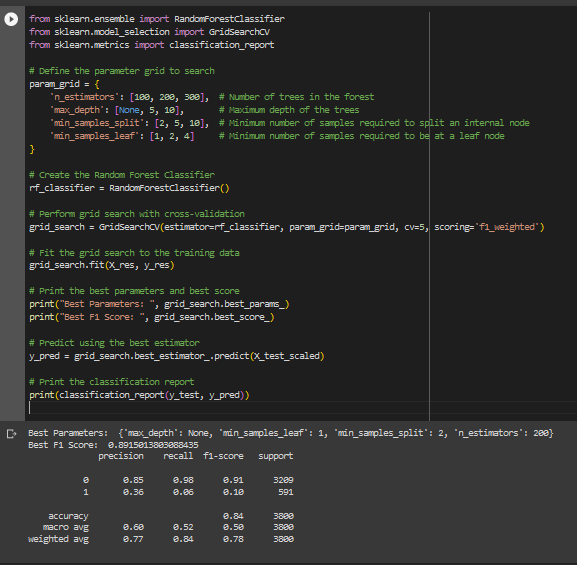

Initial Grid searches did not provide satisfactory F1 weighted scores hence a Random forest model with manually chosen hyper parameters was used